In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

In [2]:
# Import data sets
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head(5)

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
0,A671945,Hambone,2014-02-12 18:22:00,Return_to_owner,NaN,Dog,Neutered Male,1 year,Shetland Sheepdog Mix,Brown/White
1,A656520,Emily,2013-10-13 12:44:00,Euthanasia,Suffering,Cat,Spayed Female,1 year,Domestic Shorthair Mix,Cream Tabby
2,A686464,Pearce,2015-01-31 12:28:00,Adoption,Foster,Dog,Neutered Male,2 years,Pit Bull Mix,Blue/White
3,A683430,NaN,2014-07-11 19:09:00,Transfer,Partner,Cat,Intact Male,3 weeks,Domestic Shorthair Mix,Blue Cream
4,A667013,NaN,2013-11-15 12:52:00,Transfer,Partner,Dog,Neutered Male,2 years,Lhasa Apso/Miniature Poodle,Tan


In [4]:
print(train.shape)

(26729, 10)


In [7]:
# Null Values

In [8]:
train.isnull().sum()

AnimalID              0
Name               7691
DateTime              0
OutcomeType           0
OutcomeSubtype    13612
AnimalType            0
SexuponOutcome        1
AgeuponOutcome       18
Breed                 0
Color                 0
dtype: int64

In [9]:
train.describe()

,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,Color
count,26729,19038,26729,26729,13117,26729,26728,26711,26729,26729
unique,26729,6374,22918,5,16,2,5,44,1380,366
top,A683949,Max,2015-08-11 00:00:00,Adoption,Partner,Dog,Neutered Male,1 year,Domestic Shorthair Mix,Black/White
freq,1,136,19,10769,7816,15595,9779,3969,8810,2824


In [10]:
# Extract year, month, day, hour from datetime
train['year'] = pd.DatetimeIndex(train.DateTime).year
train['month'] = pd.DatetimeIndex(train.DateTime).month
train['day'] = pd.DatetimeIndex(train.DateTime).day
train['hour'] = pd.DatetimeIndex(train.DateTime).hour
train['dayofweek'] = pd.DatetimeIndex(train.DateTime).dayofweek
train['date'] = pd.DatetimeIndex(train.DateTime).date
train['monthyear'] = pd.DatetimeIndex(train.DateTime).strftime('%Y-%m')
train['IsWeekend'] = (pd.DatetimeIndex(train.DateTime).dayofweek) // 5 == 1

In [11]:
# See all SexuponOutcome options
train.SexuponOutcome = train.SexuponOutcome.astype(str)
train.SexuponOutcome.value_counts()

Neutered Male    9779
Spayed Female    8820
Intact Male      3525
Intact Female    3511
Unknown          1093
nan                 1
Name: SexuponOutcome, dtype: int64

In [15]:
# Feature Enginnering

In [16]:
# Split Sexupon Outcome to Sex and Alter Type
def is_altered(SexuponOutcome):
    if "unknown" in SexuponOutcome.lower():
        return "Unknown"
    elif "intact" in SexuponOutcome.lower():
        return "Intact"
    else:
        return "Altered"

In [17]:
def gender(SexuponOutcome):
    if "unknown" in SexuponOutcome.lower():
        return "Unknown"
    elif "female" in SexuponOutcome.lower():
        return "Female"
    else:
        return "Male"

In [18]:
train['Is_Altered'] = train.SexuponOutcome.apply(is_altered)
train['Gender'] = train.SexuponOutcome.apply(gender)

In [19]:
# Identify mixed breed vs full breed
def breed_type(breed):
#     if "/" in breed or "mix" in breed.lower():
    if "mix" in breed.lower():
        return "Mixed Breed"
    else:
        return "Full Breed"

In [20]:
train['Breed_Type'] = train.Breed.apply(breed_type)

In [21]:
# Check if pet has a name
def has_name(name):
    if pd.isnull(name):
        return False
    else:
        return True

In [22]:
train['Has_Name'] = train.Name.apply(has_name)

In [23]:
# Extract pet age from string and adjust age if less than 1 years old
def clean_age(x):
    if x == 'nan': return 0
    age = int(x.split()[0])
    if x.find('year') > -1: return age 
    if x.find('month')> -1: return age / 12.
    if x.find('week')> -1: return age / 52.
    if x.find('day')> -1: return age / 365.
    else: return 0

In [24]:
train.AgeuponOutcome = train.AgeuponOutcome.astype(str)
train['Age'] = train.AgeuponOutcome.apply(clean_age)

C:\Users\91983\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

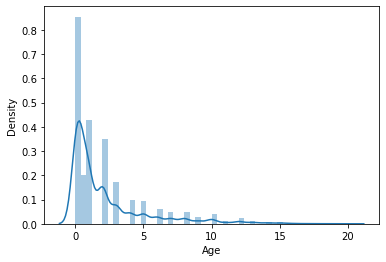

In [25]:
# Distribution of ages
sns.distplot(train.Age)

<AxesSubplot:xlabel='OutcomeType', ylabel='count'>

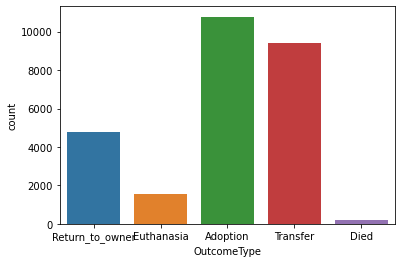

In [26]:
# Distribution of outcome type
sns.countplot(x = train.OutcomeType)

<AxesSubplot:xlabel='Gender', ylabel='count'>

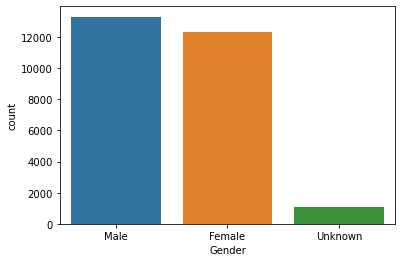

In [27]:
# number of pets by sex
sns.countplot(x="Gender", data = train)

<AxesSubplot:xlabel='Gender', ylabel='count'>

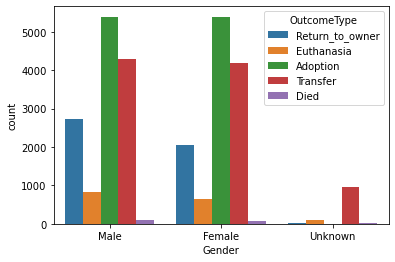

In [28]:
# what are the outcomes by sex
sns.countplot(x="Gender", hue = "OutcomeType", data = train)

<AxesSubplot:xlabel='AnimalType', ylabel='count'>

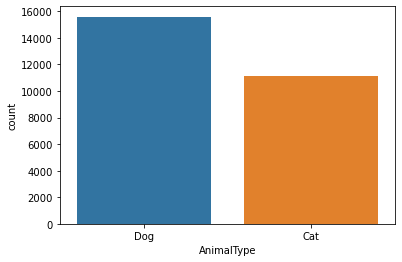

In [29]:
sns.countplot(x="AnimalType", data = train)

In [30]:
# Total outcomes by animal type
train.AnimalType.value_counts()

Dog    15595
Cat    11134
Name: AnimalType, dtype: int64

<AxesSubplot:>

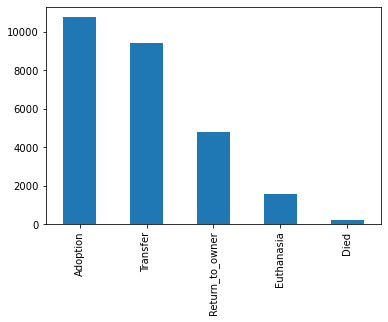

In [31]:
train['OutcomeType'].value_counts().plot.bar()

[Text(0.5, 0, 'Type of Animal'),
 Text(0, 0.5, 'Total Outcomes by Type'),
 Text(0.5, 1.0, 'Outcome by Animal')]

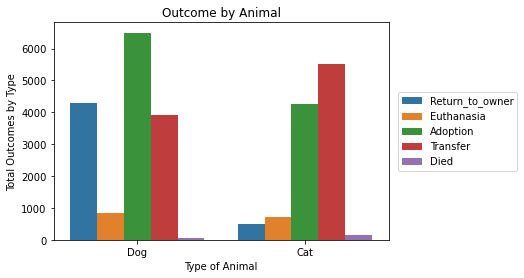

In [32]:
# number of animals by species
ax = sns.countplot(x="AnimalType", hue = "OutcomeType", data = train)
ax.legend(loc = 5, bbox_to_anchor=(1.4, 0.5))
ax.set(xlabel = "Type of Animal",
       ylabel = "Total Outcomes by Type",
       title = "Outcome by Animal")

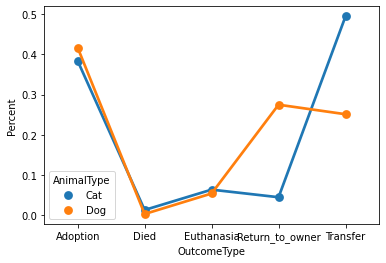

In [33]:
def rel_freq_plot(train, column):
    sns.pointplot(x = 'OutcomeType', y = 'Percent', hue = column, data = (train
        .groupby(['OutcomeType', column])
        .size()
        .reset_index()
        .rename(columns = {0: 'Count'})
        .merge(
            (train
             .groupby([column])
             .size()
             .reset_index()
             .rename(columns = {0: 'Total'})
            ), how = 'inner', on = column)
        .assign(Percent = lambda x: x.Count / x.Total)
    ))
    
rel_freq_plot(train, 'AnimalType')

<AxesSubplot:xlabel='Is_Altered', ylabel='count'>

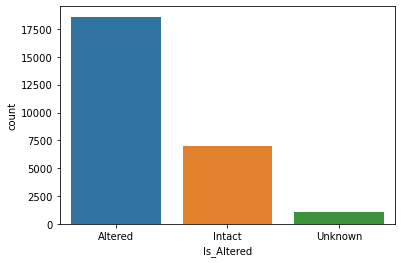

In [34]:
sns.countplot(x="Is_Altered", data = train)

<AxesSubplot:xlabel='Is_Altered', ylabel='count'>

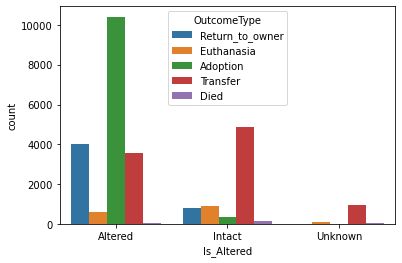

In [35]:
sns.countplot(x="Is_Altered", hue = "OutcomeType", data = train)

<AxesSubplot:xlabel='Breed_Type', ylabel='count'>

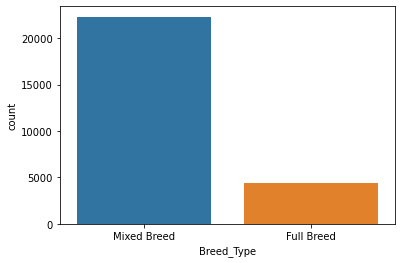

In [36]:
sns.countplot(x="Breed_Type", data = train)

<AxesSubplot:xlabel='Breed_Type', ylabel='count'>

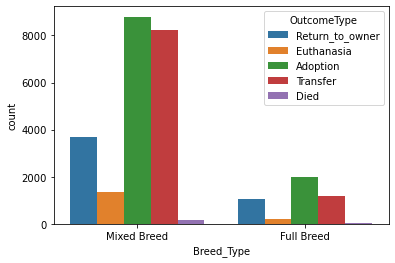

In [37]:
sns.countplot(x="Breed_Type", hue = "OutcomeType",data = train)

<AxesSubplot:xlabel='Has_Name', ylabel='count'>

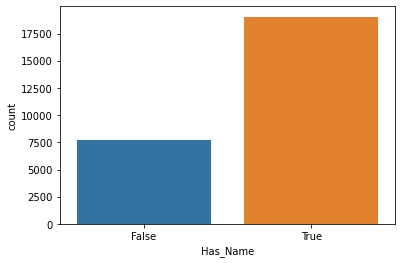

In [38]:
sns.countplot(x="Has_Name", data = train)

<AxesSubplot:xlabel='OutcomeType', ylabel='Age'>

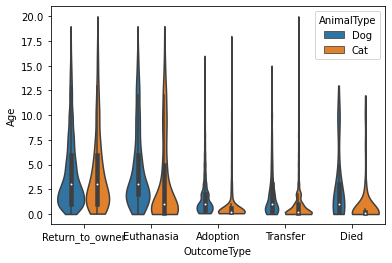

In [39]:
sns.violinplot(x = "OutcomeType", y = "Age", hue = "AnimalType", data = train, cut = 0, split = False)

<AxesSubplot:xlabel='Has_Name', ylabel='count'>

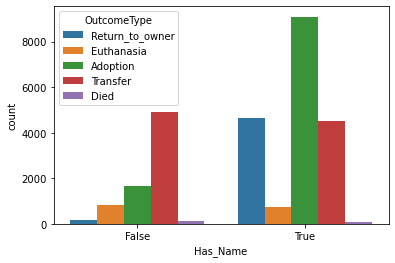

In [40]:
sns.countplot(x="Has_Name", hue = "OutcomeType", data = train)

<AxesSubplot:xlabel='hour', ylabel='count'>

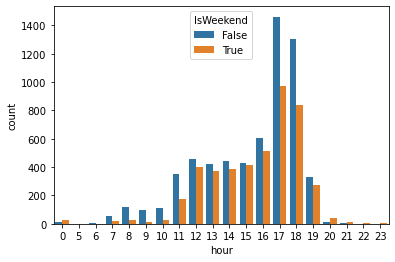

In [41]:
sns.countplot(x="hour", hue = 'IsWeekend', data = train[train.OutcomeType == 'Adoption'])

<AxesSubplot:xlabel='month', ylabel='count'>

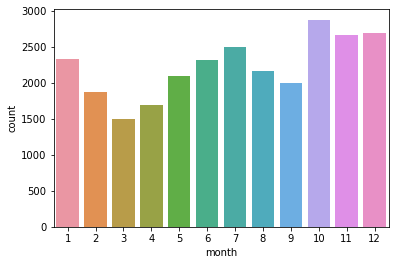

In [42]:
sns.countplot(x="month", data = train) # 2013 only has 3 months of data

In [43]:
# Create subset to show adoptions by animal type and month
adoptionTrain = train[(train.OutcomeType == "Adoption")
                        & (train.year != 2013)
                       ].groupby(by = ["AnimalType", "month"], as_index = False).count()

<AxesSubplot:xlabel='month', ylabel='AnimalID'>

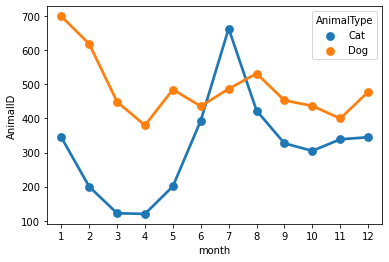

In [44]:
sns.pointplot(x = "month", y = "AnimalID", data = adoptionTrain, hue = "AnimalType")

In [45]:
# Create subset to show adoptions by animal type and mont
transferTrain = train[(train.OutcomeType == "Transfer")
                        & (train.year != 2013)
                       ].groupby(by = ["AnimalType", "month"], as_index = False).count()

<AxesSubplot:xlabel='month', ylabel='AnimalID'>

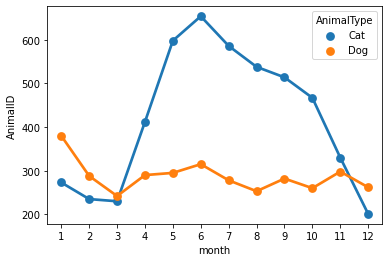

In [46]:
sns.pointplot(x = "month", y = "AnimalID", data = transferTrain, hue = "AnimalType")

In [47]:
group_train_date = train[train.OutcomeType == "Adoption"].groupby(by = ["date","IsWeekend"], as_index = False).count()

In [48]:
medians = group_train_date.groupby(by = 'IsWeekend', as_index = False).median()

In [49]:
print(medians)

   IsWeekend  AnimalID  Name  DateTime  OutcomeType  OutcomeSubtype  \
0      False       9.0   8.0       9.0          9.0             1.0   
1       True      17.0  14.5      17.0         17.0             2.0   

   AnimalType  SexuponOutcome  AgeuponOutcome  Breed  ...  month   day  hour  \
0         9.0             9.0             9.0    9.0  ...    9.0   9.0   9.0   
1        17.0            17.0            17.0   17.0  ...   17.0  17.0  17.0   

   dayofweek  monthyear  Is_Altered  Gender  Breed_Type  Has_Name   Age  
0        9.0        9.0         9.0     9.0         9.0       9.0   9.0  
1       17.0       17.0        17.0    17.0        17.0      17.0  17.0  

[2 rows x 22 columns]


Text(0.5, 0.98, 'Adoptions by Day of the Week')

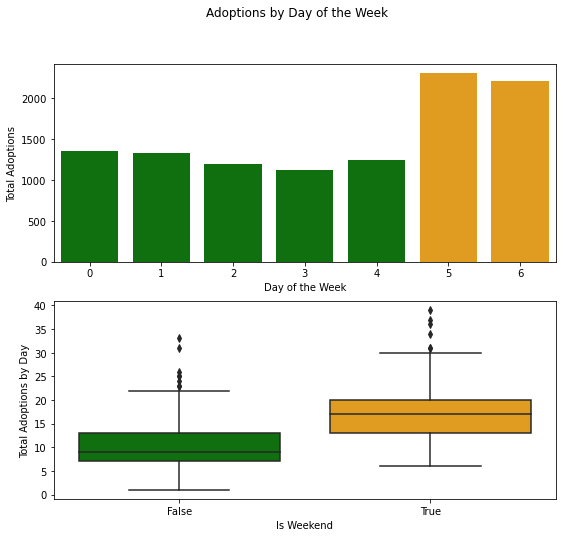

In [50]:
# Most adoptions happen on Sat-Sun
fig, axes = plt.pyplot.subplots(nrows=2, sharey=False, figsize=(9,8))
sns.countplot(x="dayofweek", data = train[train.OutcomeType == 'Adoption'],
             ax=axes[0],  palette=["Green","Green","Green","Green","Green","Orange", "Orange"])
sns.boxplot(x = "IsWeekend", y = "AnimalID", data = group_train_date[group_train_date.AnimalID < 40],
           ax=axes[1], palette=['Green','Orange'])
axes[0].set(xlabel="Day of the Week", ylabel="Total Adoptions")
axes[1].set(xlabel="Is Weekend", ylabel="Total Adoptions by Day")
fig.suptitle("Adoptions by Day of the Week")

Text(0.5, 0.98, 'Outcomes for Pets with and without Names')

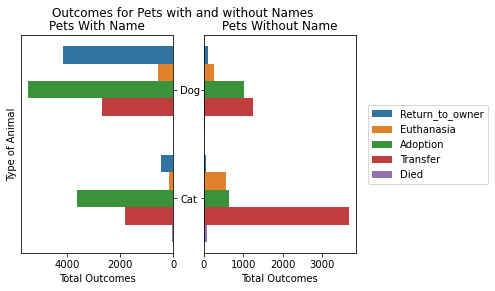

In [41]:
fig, axes = plt.pyplot.subplots(ncols=2, sharey=True)

sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              ax=axes[0],
              data = train[train.Has_Name == True])
sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              data = train[train.Has_Name == False])
axes[0].invert_xaxis()
axes[0].yaxis.tick_right()
axes[0].set_title("Pets With Name")
axes[1].set_title("Pets Without Name")
axes[0].set(xlabel="Total Outcomes", ylabel="Type of Animal")
axes[1].set(xlabel="Total Outcomes", ylabel="")
axes[0].legend_.remove()
axes[1].legend(loc = 5, bbox_to_anchor=(1.9, 0.5))
fig.suptitle("Outcomes for Pets with and without Names")

<AxesSubplot:xlabel='count', ylabel='AnimalType'>

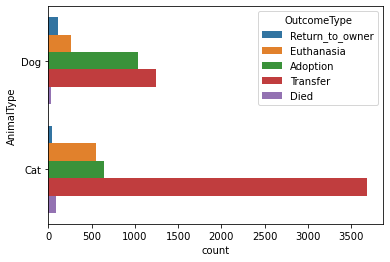

In [42]:
sns.countplot(y="AnimalType", hue = "OutcomeType",
              order=['Dog','Cat'],
              hue_order = ['Return_to_owner','Euthanasia','Adoption','Transfer','Died'],
              data = train[train.Has_Name == False])

In [43]:
group_train_my = train[train.OutcomeType == "Adoption"].groupby(by = ["AnimalType","monthyear"], as_index = False).count()

In [44]:
group_train_my_transfer = train[train.OutcomeType == "Transfer"].groupby(by = ["AnimalType","monthyear"], as_index = False).count()

C:\Users\91983\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


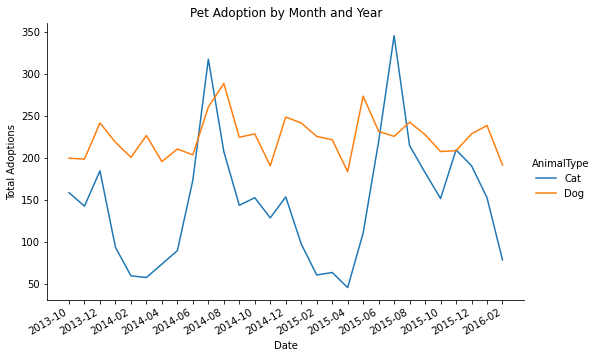

In [45]:
g = sns.FacetGrid(group_train_my, hue='AnimalType', size=5, aspect=1.5)
g.map(plt.pyplot.plot, 'monthyear', 'OutcomeType').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Total Adoptions',
         title='Pet Adoption by Month and Year')
for label in g.ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
g.fig.autofmt_xdate()

C:\Users\91983\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


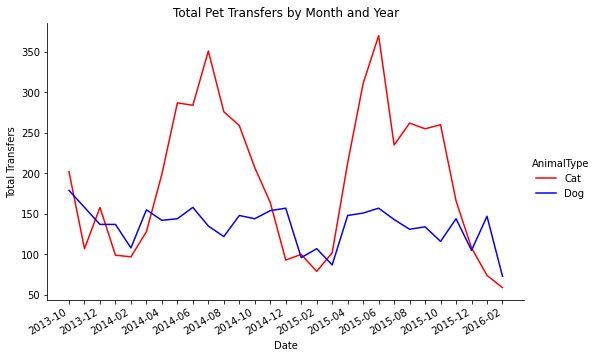

In [46]:
g = sns.FacetGrid(group_train_my_transfer, hue='AnimalType', size=5, aspect=1.5, palette = ['Red','Blue'])
g.map(plt.pyplot.plot, 'monthyear', 'OutcomeType').add_legend()
g.ax.set(xlabel='Date',
         ylabel='Total Transfers',
         title='Total Pet Transfers by Month and Year')
for label in g.ax.xaxis.get_ticklabels()[1::2]:
    label.set_visible(False)
g.fig.autofmt_xdate()

In [47]:
# Group adoptions by hour
adoptions_time = train[train.OutcomeType == 'Adoption'].groupby(by='hour', as_index = False).count()

In [48]:
adoptions_time

,hour,AnimalID,Name,DateTime,OutcomeType,OutcomeSubtype,AnimalType,SexuponOutcome,AgeuponOutcome,Breed,...,day,dayofweek,date,monthyear,IsWeekend,Is_Altered,Gender,Breed_Type,Has_Name,Age
0,0,37,30,37,37,3,37,37,37,37,...,37,37,37,37,37,37,37,37,37,37
1,5,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
2,6,7,3,7,7,6,7,7,7,7,...,7,7,7,7,7,7,7,7,7,7
3,7,79,69,79,79,69,79,79,79,79,...,79,79,79,79,79,79,79,79,79,79
4,8,143,120,143,143,134,143,143,143,143,...,143,143,143,143,143,143,143,143,143,143
5,9,114,95,114,114,102,114,114,114,114,...,114,114,114,114,114,114,114,114,114,114
6,10,136,117,136,136,102,136,136,136,136,...,136,136,136,136,136,136,136,136,136,136
7,11,530,457,530,530,181,530,530,530,530,...,530,530,530,530,530,530,530,530,530,530
8,12,863,767,863,863,183,863,863,863,863,...,863,863,863,863,863,863,863,863,863,863
9,13,798,714,798,798,157,798,798,798,798,...,798,798,798,798,798,798,798,798,798,798


[Text(0.5, 0, 'Hour in Day'),
 Text(0, 0.5, 'Total Adoptions'),
 Text(0.5, 1.0, 'Total Adoptions by Hour')]

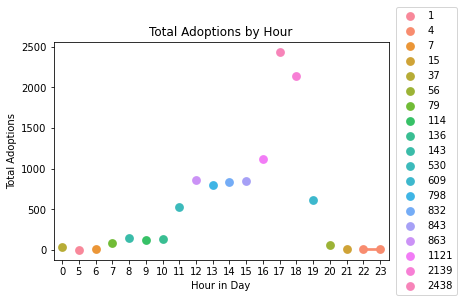

In [49]:
ax = sns.pointplot(x = 'hour', y = 'AnimalID',data = adoptions_time, hue = 'IsWeekend')
ax.legend(loc = 5, bbox_to_anchor=(1.22, 0.5))
ax.set(xlabel = "Hour in Day",
       ylabel = "Total Adoptions",
       title = "Total Adoptions by Hour")

In [50]:
something = train.groupby(by=['AnimalType', 'OutcomeType'], as_index = False).count()

In [51]:
something

,AnimalType,OutcomeType,AnimalID,Name,DateTime,OutcomeSubtype,SexuponOutcome,AgeuponOutcome,Breed,Color,...,hour,dayofweek,date,monthyear,IsWeekend,Is_Altered,Gender,Breed_Type,Has_Name,Age
0,Cat,Adoption,4272,3626,4272,1160,4272,4272,4272,4272,...,4272,4272,4272,4272,4272,4272,4272,4272,4272,4272
1,Cat,Died,147,55,147,137,147,147,147,147,...,147,147,147,147,147,147,147,147,147,147
2,Cat,Euthanasia,710,156,710,709,710,710,710,710,...,710,710,710,710,710,710,710,710,710,710
3,Cat,Return_to_owner,500,456,500,0,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
4,Cat,Transfer,5505,1822,5505,5505,5505,5505,5505,5505,...,5505,5505,5505,5505,5505,5505,5505,5505,5505,5505
5,Dog,Adoption,6497,5465,6497,806,6497,6497,6497,6497,...,6497,6497,6497,6497,6497,6497,6497,6497,6497,6497
6,Dog,Died,50,22,50,44,50,50,50,50,...,50,50,50,50,50,50,50,50,50,50
7,Dog,Euthanasia,845,584,845,845,845,845,845,845,...,845,845,845,845,845,845,845,845,845,845
8,Dog,Return_to_owner,4286,4177,4286,0,4286,4286,4286,4286,...,4286,4286,4286,4286,4286,4286,4286,4286,4286,4286
9,Dog,Transfer,3917,2675,3917,3911,3917,3917,3917,3917,...,3917,3917,3917,3917,3917,3917,3917,3917,3917,3917
